# EXPLORATORY DATA ANALYSIS EDA

# TEMÁTICA DEL ANÁLISIS: 

## USO DE REDES SOCIALES ENTRE ESTUDIANTES

<p align="center">
  <img src="descarga.png" width="500">
</p>

El dataset aborda el uso de redes sociales entre estudiantes y su posible impacto en distintos aspectos de su vida cotidiana y bienestar. Contiene información sobre horas promedio de uso diario, plataformas más utilizadas, nivel académico, sueño, salud mental, adicción y conflictos relacionados con redes sociales. 

La temática permite realizar un análisis exploratorio para identificar patrones y relaciones entre los hábitos digitales de los estudiantes y factores personales, sociales y académicos, proporcionando una visión integral de cómo las redes sociales se integran en su rutina y cómo pueden influir en su bienestar.

In [60]:
import numpy as np
import pandas as pd
import warnings # importa todos los warnings de versión y os ignora
import plotly.express as px
warnings.filterwarnings("ignore")

social_media = pd.read_csv("Students_Social_Media_Addiction.csv", sep=",")
social_media.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [2]:
social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [3]:
social_media.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


#### Rango de edades estudiado

In [4]:
social_media["Age"].unique()

array([19, 22, 20, 18, 21, 23, 24])

### Hipótesis 1: Relación entre tiempo de uso diario y rendimiento académico

Hipótesis: Los estudiantes que reportan un mayor promedio de horas diarias en redes sociales tienen más probabilidades de que su rendimiento académico se vea afectado.

Variables: Avg_Daily_Usage_Hours, Affects_Academic_Performance.

### Hipótesis 2: Influencia de la plataforma más utilizada en el puntaje de adicción
º
Hipótesis: Los estudiantes que usan TikTok o Instagram como plataforma principal tienen puntajes de adicción más altos que los que usan LinkedIn o Snapchat.

Variables: Most_Used_Platform, Addicted_Score

### Hipótesis 3: Efecto del uso de redes sociales en el sueño

Hipótesis: A mayor tiempo promedio en redes sociales, menor cantidad de horas de sueño por noche.

Variables: Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night.

### Hipótesis 4: Diferencias de salud mental según el nivel académico

Hipótesis: Los estudiantes de nivel de educación más alto (Graduados) reportan un mejor puntaje de salud mental que los de Secundaria, o un menor nivel académico, posiblemente porque gestionan mejor su tiempo y uso de redes sociales.

Variables: Academic_Level, Mental_Health_Score, Avg_Daily_Usage_Hours

#### Redes sociales mas utilizadas

In [5]:
social_media["Most_Used_Platform"].value_counts()

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

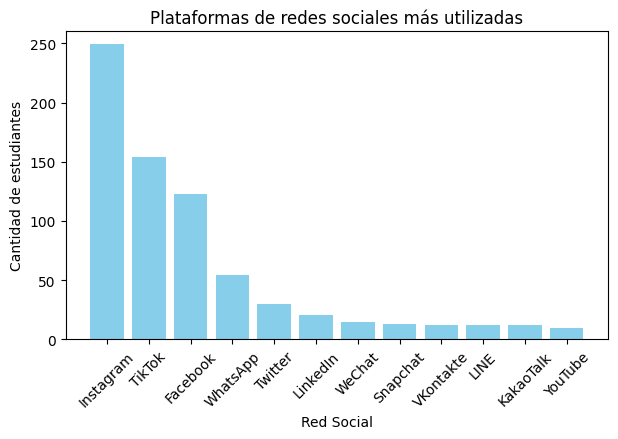

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure();

redes_sociales = social_media["Most_Used_Platform"].value_counts()

plt.figure(figsize=(7,4));
plt.bar(redes_sociales.index, redes_sociales.values, color="skyblue")
plt.title("Plataformas de redes sociales más utilizadas")
plt.xlabel("Red Social")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=45)
plt.ylim(0, 260)
plt.show();

#### Media de horas de uso diaras según género

In [7]:
social_media.groupby("Gender")["Avg_Daily_Usage_Hours"].mean()

Gender
Female    5.011048
Male      4.826136
Name: Avg_Daily_Usage_Hours, dtype: float64

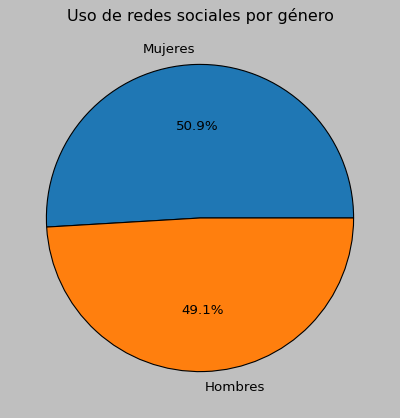

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

valores = social_media.groupby("Gender")["Avg_Daily_Usage_Hours"].mean()
plt.figure()
valores.index = valores.index.map({
    "Male": "Hombres",
    "Female": "Mujeres"
})
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', colors = ["#1F77B4", "#FF7F0E"])
plt.title("Uso de redes sociales por género")
plt.show();

In [9]:
social_media.groupby("Country")["Most_Used_Platform"].value_counts()

Country       Most_Used_Platform
Afghanistan   LinkedIn              1
Albania       TikTok                1
Andorra       TikTok                1
Argentina     TikTok                1
Armenia       Instagram             1
                                   ..
Uzbekistan    TikTok                1
Vatican City  YouTube               1
Venezuela     Facebook              1
Vietnam       Facebook              1
Yemen         Facebook              1
Name: count, Length: 171, dtype: int64

In [10]:
social_media.groupby("Country")["Addicted_Score"].mean().max()

np.float64(9.0)

#### País con mayor media de adiccion a las redes sociales: ARMENIA

In [11]:
social_media.groupby("Country")["Addicted_Score"].mean().idxmax()

'Armenia'

#### País con mayor media de horas de uso diaras: USA

In [12]:
social_media.groupby("Country")["Avg_Daily_Usage_Hours"].mean().idxmax()

'USA'

#### Media de horas de uso diaras según estado sentimental

In [13]:
social_media.groupby("Relationship_Status")["Avg_Daily_Usage_Hours"].mean()

Relationship_Status
Complicated        4.721875
In Relationship    4.930796
Single             4.926042
Name: Avg_Daily_Usage_Hours, dtype: float64

#### Suma de horas de uso diaras según género

In [14]:
social_media.groupby("Gender")["Avg_Daily_Usage_Hours"].sum()

Gender
Female    1768.9
Male      1698.8
Name: Avg_Daily_Usage_Hours, dtype: float64

In [15]:
social_media[social_media["Country"] == "Armenia"]["Addicted_Score"]


79    9
Name: Addicted_Score, dtype: int64

In [16]:
social_media[social_media["Country"] == "Armenia"].count()

Student_ID                      1
Age                             1
Gender                          1
Academic_Level                  1
Country                         1
Avg_Daily_Usage_Hours           1
Most_Used_Platform              1
Affects_Academic_Performance    1
Sleep_Hours_Per_Night           1
Mental_Health_Score             1
Relationship_Status             1
Conflicts_Over_Social_Media     1
Addicted_Score                  1
dtype: int64

In [17]:
social_media["Country"] == "Armenia"

0      False
1      False
2      False
3      False
4      False
       ...  
700    False
701    False
702    False
703    False
704    False
Name: Country, Length: 705, dtype: bool

In [18]:
print(social_media["Country"].value_counts())

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64


# Hipótesis 1: Relación entre tiempo de uso diario y rendimiento académico

Hipótesis: Los estudiantes que reportan un mayor promedio de horas diarias en redes sociales tienen más probabilidades de que su rendimiento académico se vea afectado.

Variables: Avg_Daily_Usage_Hours, Affects_Academic_Performance.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [20]:
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## Gráfico 1

In [21]:
# MEDIA
df_media_horas = round(social_media.groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].mean().reset_index(), 1)

In [22]:
# MEDIANA
df_mediana_horas = round(social_media.groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].median().reset_index(), 1)
round(social_media.groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].median().reset_index(), 1)


,Affects_Academic_Performance,Avg_Daily_Usage_Hours
0,No,3.9
1,Yes,5.5


In [23]:
# MODA
moda_usage = (social_media
              .groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"]
              .agg(lambda x: round(x.mode()[0], 2))
              .reset_index())

print(moda_usage)

  Affects_Academic_Performance  Avg_Daily_Usage_Hours
0                           No                    4.4
1                          Yes                    4.7


GRAFICA CON MEDIA

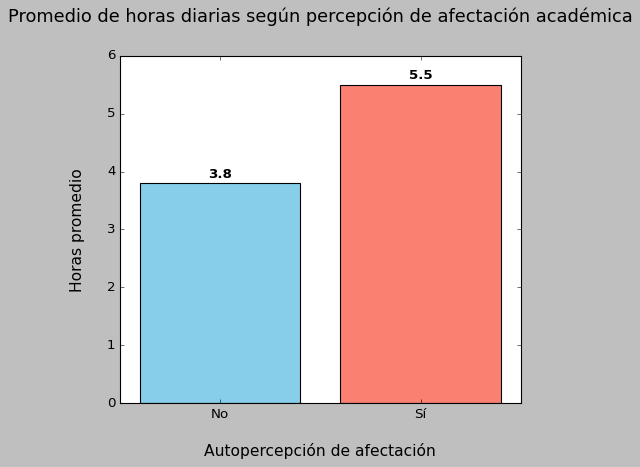

In [24]:
plt.figure(figsize=(6,6))
plt.bar(df_media_horas['Affects_Academic_Performance'], df_media_horas['Avg_Daily_Usage_Hours'], color=['skyblue', 'salmon'] )
plt.title("Promedio de horas diarias según percepción de afectación académica", pad=30, fontsize=16)
plt.xlabel("Autopercepción de afectación", labelpad=20, fontsize=14)
plt.ylabel("Horas promedio", labelpad=20, fontsize=14)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)

plt.xticks([0, 1], ["No", "Sí"])

promedios = df_media_horas['Avg_Daily_Usage_Hours']

for indice, valor in enumerate(promedios):
    plt.text(indice, valor + 0.1, f"{valor}", ha='center', fontweight='bold')

plt.xlim(-0.5, len(df_media_horas['Affects_Academic_Performance']) - 0.5)
plt.tight_layout()
plt.show()

GRAFICA CON MEDIANA

## Gráfico 2

In [25]:
social_media["Affects_Academic_Performance"] == "Yes"
social_media["Affects_Academic_Performance"] == "No"
social_media["Gender"] == "Male"
social_media["Gender"] == "Female"


0       True
1      False
2       True
3      False
4      False
       ...  
700     True
701    False
702     True
703    False
704     True
Name: Gender, Length: 705, dtype: bool

In [26]:
valores_yes = social_media[social_media["Affects_Academic_Performance"] == "Yes"]['Avg_Daily_Usage_Hours']
valores_no = social_media[social_media["Affects_Academic_Performance"] == "No"]['Avg_Daily_Usage_Hours']
valores_hombres = social_media[social_media["Gender"] == "Male"]['Avg_Daily_Usage_Hours']
valores_mujeres = social_media[social_media["Gender"] == "Female"]['Avg_Daily_Usage_Hours']

In [27]:
hombres_yes = social_media[(social_media["Affects_Academic_Performance"] == "Yes") & (social_media["Gender"] == "Male")]['Avg_Daily_Usage_Hours']
hombres_no = social_media[(social_media["Affects_Academic_Performance"] == "No") & (social_media["Gender"] == "Male")]['Avg_Daily_Usage_Hours']
mujeres_yes = social_media[(social_media["Affects_Academic_Performance"] == "Yes") & (social_media["Gender"] == "Female")]['Avg_Daily_Usage_Hours']
mujeres_no = social_media[(social_media["Affects_Academic_Performance"] == "No") & (social_media["Gender"] == "Female")]['Avg_Daily_Usage_Hours']
print(len(hombres_yes))
print(len(hombres_no))
print(len(mujeres_yes))
print(len(mujeres_no))

222
130
231
122


In [28]:
"""
Eje x :

hombres_no → x = 0 − 0.1

mujeres_no → x = 0 + 0.1

hombres_yes → x = 1 − 0.1

mujeres_yes → x = 1 + 0.1
"""

# Listas de y (valores reales)
lista_hombres_yes = list(hombres_yes)
lista_hombres_no = list(hombres_no)
lista_mujeres_yes = list(mujeres_yes)
lista_mujeres_no = list(mujeres_no)

# Listas de x (posición en el eje x)
# Creamos lista con el desplzamiento tantas veces como numero de valores hay en cada lista 
x_hombres_no = [-0.1] * len(lista_hombres_no)
x_mujeres_no = [0.1] * len(lista_mujeres_no)
x_hombres_yes = [0.9] * len(lista_hombres_yes)
x_mujeres_yes = [1.1] * len(lista_mujeres_yes)

# Listas colores
colores_hombres_no = ["palegreen"] *len(lista_hombres_no)
colores_mujeres_no = ["lightsalmon"] *len(lista_mujeres_no)
colores_hombres_yes = ["palegreen"] *len(hombres_yes)
colores_mujeres_yes = ["lightsalmon"] *len(lista_mujeres_yes)

In [29]:
x_hombres_no_jitter = []

for i in x_hombres_no:
    i = i + np.random.uniform(-0.05, 0.05)
    x_hombres_no_jitter.append(i)

x_mujeres_no_jitter = []

for i in x_mujeres_no:
    i = i + np.random.uniform(-0.05, 0.05)
    x_mujeres_no_jitter.append(i)

x_hombres_yes_jitter = []

for i in x_hombres_yes:
    i = i + np.random.uniform(-0.05, 0.05)
    x_hombres_yes_jitter.append(i)

x_mujeres_yes_jitter = []

for i in x_mujeres_yes:
    i = i + np.random.uniform(-0.05, 0.05)
    x_mujeres_yes_jitter.append(i)

In [30]:
y_total =  lista_hombres_no + lista_mujeres_no + lista_hombres_yes + lista_mujeres_yes
x_total = x_hombres_no_jitter + x_mujeres_no_jitter + x_hombres_yes_jitter + x_mujeres_yes_jitter
colores_total = colores_hombres_no + colores_mujeres_no + colores_hombres_yes + colores_mujeres_yes


In [31]:
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [32]:
media_yes = round(social_media[social_media["Affects_Academic_Performance"] == "Yes"].groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].mean().reset_index(), 1)
media_no = round(social_media[social_media["Affects_Academic_Performance"] == "No"].groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].mean().reset_index(), 1)
y_media_yes = media_yes["Avg_Daily_Usage_Hours"].iloc[0]
y_media_no = media_no["Avg_Daily_Usage_Hours"].iloc[0]

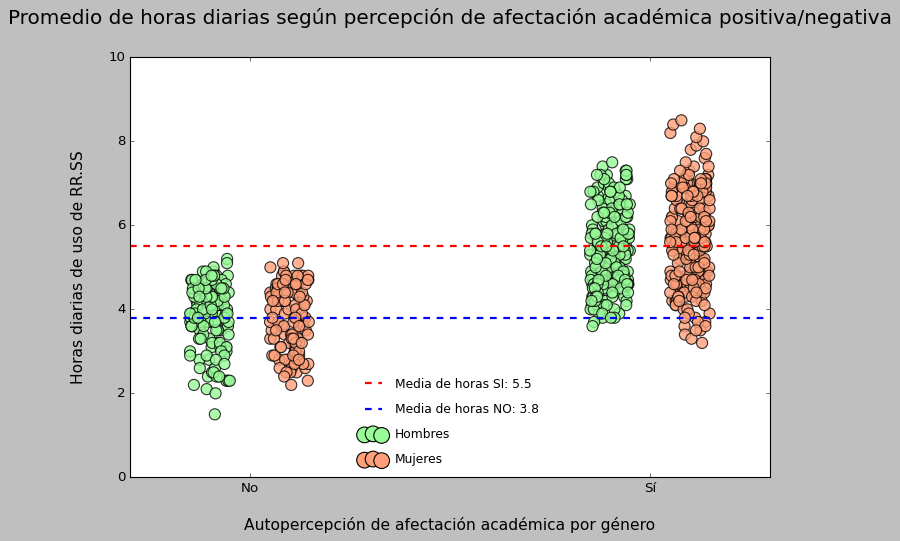

In [33]:
plt.figure(figsize=(10,7))

plt.axhline(y=y_media_yes, color='red', linestyle='--', linewidth=2, label='Media de horas SI: 5.5')
plt.axhline(y=y_media_no, color='blue', linestyle='--', linewidth=2, label='Media de horas NO: 3.8')

plt.scatter(x_total, y_total, c=colores_total, alpha=0.8, s=100)

plt.title("Promedio de horas diarias según percepción de afectación académica positiva/negativa", pad=30, fontsize=18)
plt.xlabel("Autopercepción de afectación académica por género", labelpad=20, fontsize=14)
plt.ylabel("Horas diarias de uso de RR.SS", labelpad=20, fontsize=14)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)

p_hombres = plt.scatter([], [], c="palegreen", s=200, label="Hombres")
p_mujeres = plt.scatter([], [], c="lightsalmon", s=200, label="Mujeres")

plt.xticks([0, 1], ["No", "Sí"])
plt.xlim(-0.3, 1.3)
plt.ylim(0, 10)

plt.legend(frameon=False, loc="lower center", fontsize=11, labelspacing=1)

plt.show();

## Gráfico 3

In [34]:
medias_niv_acad = social_media.groupby(["Affects_Academic_Performance", "Academic_Level"])["Avg_Daily_Usage_Hours"].mean().reset_index()
medias_niv_acad

,Affects_Academic_Performance,Academic_Level,Avg_Daily_Usage_Hours
0,No,Graduate,3.723016
1,No,High School,3.500000
2,No,Undergraduate,3.891935
3,Yes,Graduate,5.444221
4,Yes,High School,5.708000
5,Yes,Undergraduate,5.602183


In [35]:
dict_mapeo = {"No": 0, "Yes": 1}
medias_niv_acad["Conv"] = medias_niv_acad["Affects_Academic_Performance"].map(dict_mapeo)
medias_niv_acad

,Affects_Academic_Performance,Academic_Level,Avg_Daily_Usage_Hours,Conv
0,No,Graduate,3.723016,0
1,No,High School,3.500000,0
2,No,Undergraduate,3.891935,0
3,Yes,Graduate,5.444221,1
4,Yes,High School,5.708000,1
5,Yes,Undergraduate,5.602183,1


In [36]:
niveles = medias_niv_acad['Academic_Level'].unique()

ancho = 0.2
for i, nivel in enumerate(niveles):
    print(i)
    print(nivel)


0
Graduate
1
High School
2
Undergraduate


In [37]:
niveles = medias_niv_acad['Academic_Level'].unique()

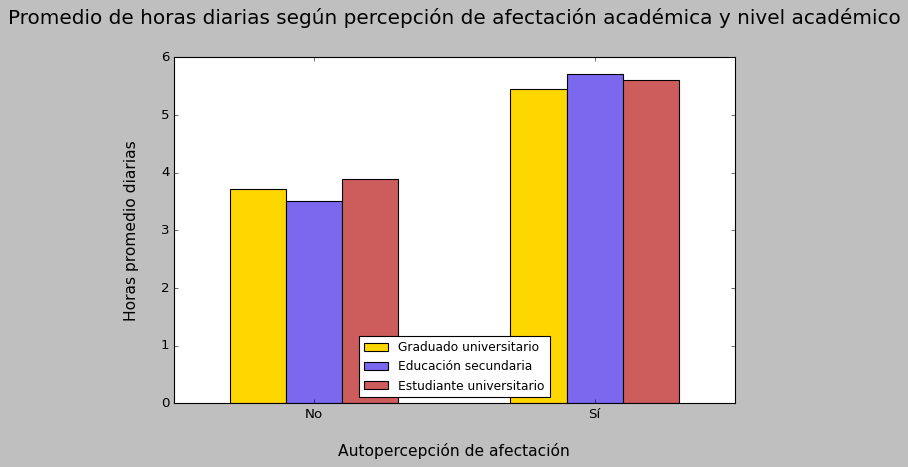

In [38]:
plt.figure(figsize=(8,6))

color = ['gold', 'mediumslateblue', 'indianred']
ancho = 0.2
for i, nivel in enumerate(niveles):
    df_nivel = medias_niv_acad[medias_niv_acad['Academic_Level'] == nivel]
    desplazamiento = (i - 1) * ancho   
    x = df_nivel['Conv'] + desplazamiento
    if nivel == "Graduate":
        nivel = "Graduado universitario"
    elif nivel == "Undergraduate":
        nivel = "Estudiante universitario"
    else:
        nivel = "Educación secundaria"
    plt.bar(x, df_nivel['Avg_Daily_Usage_Hours'], width=ancho, color=color[i], label = nivel)

"""
plt.bar(medias_niv_acad["Conv"] , 
        medias_niv_acad['Avg_Daily_Usage_Hours'], 
        color=['skyblue', 'salmon'],
        width=0.2)
"""
plt.xticks([0, 1], ["No", "Sí"])
plt.title("Promedio de horas diarias según percepción de afectación académica y nivel académico", pad=30, fontsize=18)
plt.xlabel("Autopercepción de afectación", labelpad=20, fontsize=14)
plt.ylabel("Horas promedio diarias", labelpad=20, fontsize=14)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)

plt.xlim(-0.5, len(df_media_horas['Affects_Academic_Performance']) - 0.5)
plt.legend(frameon=True, loc="lower center", fontsize=11, labelspacing=0.5)
plt.tight_layout()
plt.show();

### Hipótesis 2: Influencia de la plataforma más utilizada en el puntaje de adicción

Hipótesis: Los estudiantes que usan TikTok o Instagram como plataforma principal tienen puntajes de adicción más altos que los que usan LinkedIn o Snapchat.

Variables: Most_Used_Platform, Addicted_Score

In [39]:
palette_plataformas = {'Instagram': '#E1306C',
                       'Twitter': '#1DA1F2',
                       'TikTok': '#000000',
                       'YouTube': '#FF0000',
                       'Facebook': '#1877F2',
                       'LinkedIn': '#0077B5',
                       'Snapchat': '#FFFC00',
                       'LINE': '#00C300',
                       'KakaoTalk': '#F7C325',
                       'VKontakte': '#4C75A3',
                       'WhatsApp': '#25D366',
                       'WeChat': '#09B83E'}

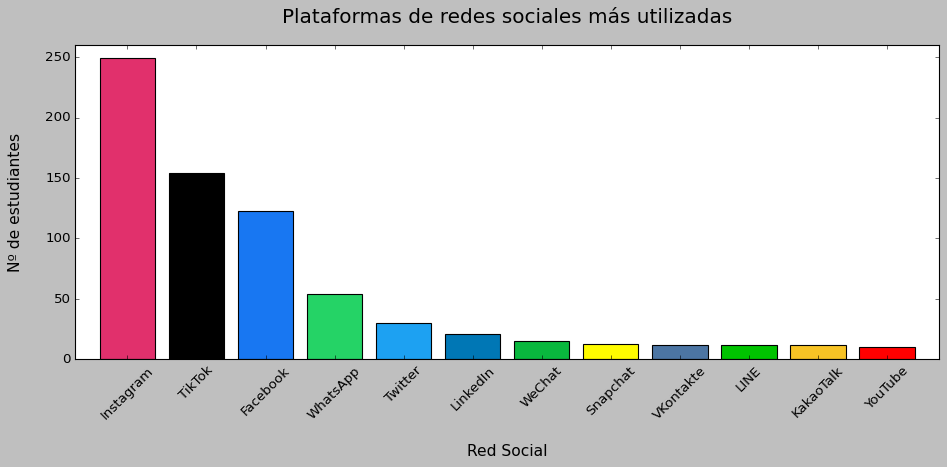

In [40]:
redes_sociales = social_media["Most_Used_Platform"].value_counts()
colores = [palette_plataformas[plataforma] for plataforma in redes_sociales.index]

plt.figure(figsize=(12,6))
plt.bar(redes_sociales.index, redes_sociales.values, color=colores)
plt.title("Plataformas de redes sociales más utilizadas", pad=20, fontsize=18)
plt.xlabel("Red Social", labelpad=20, fontsize=14)
plt.ylabel("Nº de estudiantes", labelpad=20, fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 260)
plt.margins(x=0.03)
plt.tight_layout()
plt.show();

In [41]:
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [42]:
social_media["Most_Used_Platform"].unique()

array(['Instagram', 'Twitter', 'TikTok', 'YouTube', 'Facebook',
       'LinkedIn', 'Snapchat', 'LINE', 'KakaoTalk', 'VKontakte',
       'WhatsApp', 'WeChat'], dtype=object)

In [43]:
avg_score = social_media.groupby("Most_Used_Platform")["Addicted_Score"].mean().reset_index()
avg_score

,Most_Used_Platform,Addicted_Score
0,Facebook,5.666667
1,Instagram,6.554217
2,KakaoTalk,6.000000
3,LINE,3.000000
4,LinkedIn,3.809524
5,Snapchat,7.461538
6,TikTok,7.428571
7,Twitter,5.500000
8,VKontakte,5.000000
9,WeChat,6.066667


In [44]:
redes_sociales = social_media["Most_Used_Platform"].value_counts()
orden = redes_sociales.index

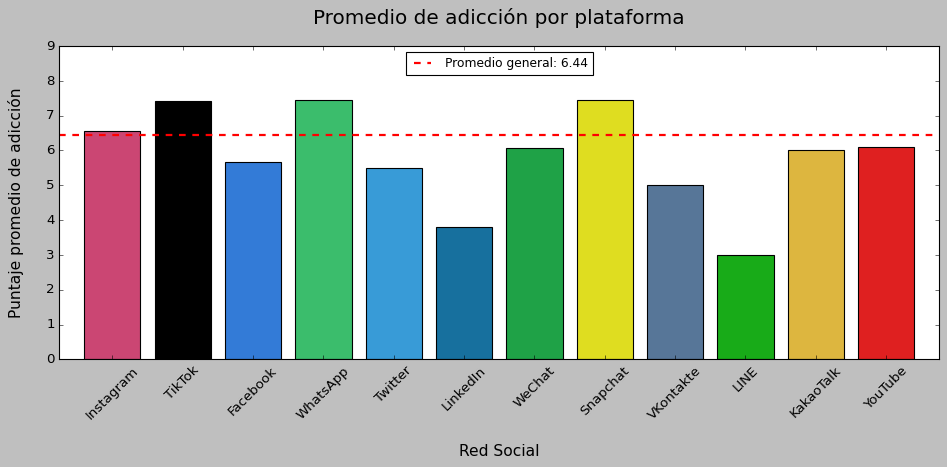

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=social_media, x="Most_Used_Platform", y="Addicted_Score", order=orden, palette=palette_plataformas, ci=None)

y_promedio = social_media["Addicted_Score"].mean()
plt.axhline(y=y_promedio, color="red", linestyle="--", linewidth=2, label=f"Promedio general: {y_promedio:.2f}")

plt.title("Promedio de adicción por plataforma", pad=20, fontsize=18)
plt.xlabel("Red Social", labelpad=20, fontsize=14)
plt.ylabel("Puntaje promedio de adicción", labelpad=20, fontsize=14)

plt.xticks(rotation=45)
plt.ylim(0, 9)
plt.margins(x=0.03)

plt.tight_layout()

plt.legend(frameon=True, loc="upper center", fontsize=11, labelspacing=0.5)

plt.show();

In [46]:
social_media.groupby("Most_Used_Platform")["Avg_Daily_Usage_Hours"].mean().reset_index()
social_media

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


### Hipótesis 3: Relación salud mental y adicción a redes sociales

Hipótesis: A mayor tiempo de uso de redes sociales, mayor es la probabilidad de presentar síntomas de deterioro en la salud mentals.

Variables: Academic_Level, Mental_Health_Score, Avg_Daily_Usage_Hours

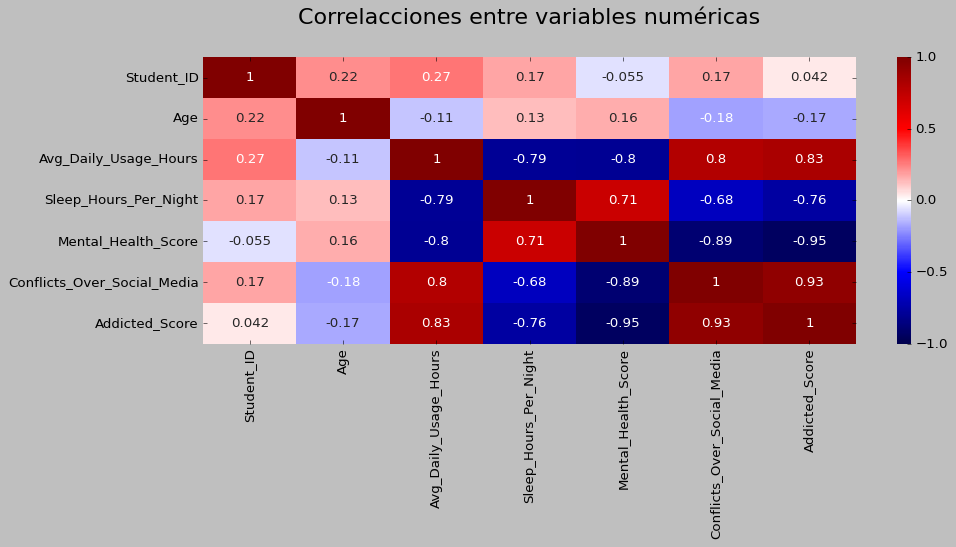

In [47]:
plt.figure(figsize=(13,7))

sns.heatmap(social_media.corr(numeric_only=True), 
            annot=True, 
            cmap="seismic", 
            vmin=-1)

plt.title("Correlacciones entre variables numéricas", pad=30, fontsize=20)

plt.tight_layout()

plt.show();



In [48]:
social_media["Mental_Health_Score"]

0      6
1      8
2      5
3      7
4      6
      ..
700    7
701    4
702    6
703    8
704    5
Name: Mental_Health_Score, Length: 705, dtype: int64

In [49]:
df_salud_adiccion_sueno = social_media[["Addicted_Score", "Mental_Health_Score", "Sleep_Hours_Per_Night"]]
df_salud_adiccion_sueno

,Addicted_Score,Mental_Health_Score,Sleep_Hours_Per_Night
0,8,6,6.5
1,3,8,7.5
2,9,5,5.0
3,4,7,7.0
4,7,6,6.0
...,...,...,...
700,5,7,7.2
701,9,4,5.9
702,7,6,6.7
703,4,8,7.5


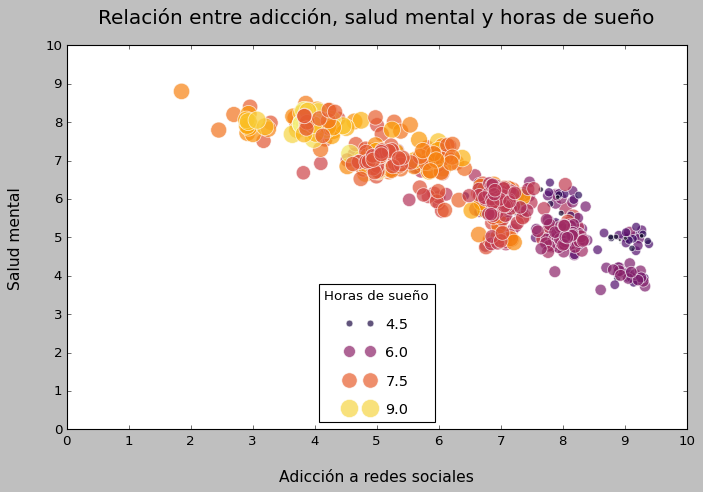

In [50]:
plt.figure(figsize=(10,6))

df_salud_adiccion_sueno['Addicted_Jitter'] = df_salud_adiccion_sueno['Addicted_Score'] + np.random.normal(0, 0.2, len(df_salud_adiccion_sueno))
df_salud_adiccion_sueno['Mental_Jitter'] = df_salud_adiccion_sueno['Mental_Health_Score'] + np.random.normal(0, 0.2, len(df_salud_adiccion_sueno))

sns.scatterplot(x='Addicted_Jitter',
                y='Mental_Jitter',
                hue='Sleep_Hours_Per_Night',     
                size='Sleep_Hours_Per_Night',    
                sizes=(1, 300),
                palette='inferno',
                alpha=0.7,
                data=df_salud_adiccion_sueno)

plt.xlabel('Adicción a redes sociales', labelpad=20, fontsize=14)
plt.ylabel('Salud mental', labelpad=20, fontsize=14)
plt.xlim(0, 10)
plt.xlim(0, 10)
plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))
plt.title('Relación entre adicción, salud mental y horas de sueño', pad=20, fontsize=18)
plt.legend(frameon=True, loc="lower center", fontsize=13, labelspacing=1, title="Horas de sueño" )
plt.show();

# Hipótesis 4: Relación entre estado sentimental, horas de uso de redes sociales y grado de adiccion

Hipótesis: Los estudiantes que reportan un mayor promedio de horas diarias en redes sociales son los que están solteros o tienen una relación complicada.

Variables: Avg_Daily_Usage_Hours, Affects_Academic_Performance.

In [51]:
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [52]:
df_relaciones = social_media[["Avg_Daily_Usage_Hours", "Addicted_Score", "Relationship_Status"]]
df_relaciones

,Avg_Daily_Usage_Hours,Addicted_Score,Relationship_Status
0,5.2,8,In Relationship
1,2.1,3,Single
2,6.0,9,Complicated
3,3.0,4,Single
4,4.5,7,In Relationship
...,...,...,...
700,4.7,5,In Relationship
701,6.8,9,Single
702,5.6,7,In Relationship
703,4.3,4,Single


In [53]:
df_relaciones_horas = df_relaciones.groupby("Relationship_Status")["Avg_Daily_Usage_Hours"].mean().reset_index()
df_relaciones_horas

,Relationship_Status,Avg_Daily_Usage_Hours
0,Complicated,4.721875
1,In Relationship,4.930796
2,Single,4.926042


In [54]:
df_relaciones_adiccion = df_relaciones.groupby("Relationship_Status")["Addicted_Score"].mean().reset_index()
df_relaciones_adiccion

,Relationship_Status,Addicted_Score
0,Complicated,7.031250
1,In Relationship,6.342561
2,Single,6.458333


In [55]:
df_relaciones_horas_adiccion = pd.merge(df_relaciones_horas, df_relaciones_adiccion).reset_index(drop=True)
df_relaciones_horas_adiccion

,Relationship_Status,Avg_Daily_Usage_Hours,Addicted_Score
0,Complicated,4.721875,7.031250
1,In Relationship,4.930796,6.342561
2,Single,4.926042,6.458333


In [63]:
df_melted = df_relaciones_horas_adiccion.melt(
    id_vars='Relationship_Status',
    value_vars=['Avg_Daily_Usage_Hours', 'Addicted_Score'],
    var_name='Variable',
    value_name='Valor'
)

df_melted['Variable'] = df_melted['Variable'].replace({
    'Avg_Daily_Usage_Hours': 'Horas diarias de uso',
    'Addicted_Score': 'Nivel de adicción'
})

fig = px.bar(
    df_melted,
    x='Relationship_Status',
    y='Valor',
    color='Variable',
    barmode='group',
    title='Relación entre horas de uso y adicción según estado sentimental',
    text=None,
    color_discrete_sequence=['#1f77b4', '#ff7f0e'],
    labels={
        'Relationship_Status': 'Estado sentimental',
        'Valor': 'Promedio',
        'Variable': 'Indicador'
    }
)

fig.update_layout(
    template='plotly_white',
    xaxis_title='Estado sentimental',
    yaxis_title='Escala de promedios',
    legend_title='Indicador'
)

fig.show()
